In [ ]:
!pip install torch torchvision torchaudio
!pip install opencv-python scikit-image tqdm pyyaml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:

%cd /content/drive/MyDrive/CellGAN-main

[Errno 2] No such file or directory: '/content/drive/MyDrive/CellGAN-main'
/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
!pip install Pillow
import os
import torch
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
from torchvision.models import resnet34
import torch.optim as optim
from sklearn.model_selection import KFold

# prompt: in above code ['ASC_H', 'ASC_US', 'HSIL', 'LSIL', 'NILM'] this should have label as 0,1,2,3,4 respectively

# ... (Your existing code)

# Data paths and parameters
data_dir = "/content/drive/MyDrive/CellGAN-main (1)/output_images"
image_size = 224  # Adjust as needed
batch_size = 64
num_epochs = 30
learning_rate = 1e-4

# Define label mapping
label_mapping = {'ASC_H': 0, 'ASC_US': 1, 'HSIL': 2, 'LSIL': 3, 'NILM': 4}

# Image transformations
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.RandomHorizontalFlip(),  # Random Flip Augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# ... (Your existing code)

# Load data
all_images = []
all_labels = []

for class_name in ['ASC_H', 'ASC_US', 'HSIL', 'LSIL', 'NILM']:
    class_path = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_path):
      image_path = os.path.join(class_path, filename)
      for fl in os.listdir(image_path):
        file_path = os.path.join(image_path, fl)
        img = Image.open(file_path).convert("RGB")
        img_transformed = transform(img)
        all_images.append(img_transformed)
        all_labels.append(label_mapping[class_name])


In [ ]:
all_images

[tensor([[[ 1.5639,  1.7865,  1.9235,  ...,  2.2489,  2.2489,  2.2489],
          [ 1.3584,  1.6153,  1.8379,  ...,  2.2489,  2.2489,  2.2489],
          [ 1.4440,  1.5468,  1.5810,  ...,  2.2489,  2.2489,  2.2489],
          ...,
          [ 0.0569,  0.0569,  0.0569,  ...,  1.1872,  1.1529,  1.0502],
          [ 0.0569,  0.0227, -0.1657,  ...,  1.4612,  1.5468,  1.3755],
          [-0.1828, -0.1143, -0.3027,  ...,  1.5297,  1.6324,  1.4440]],
 
         [[ 1.8859,  2.1485,  2.2885,  ...,  2.4286,  2.4286,  2.4286],
          [ 1.7983,  2.0609,  2.2535,  ...,  2.4286,  2.4286,  2.4286],
          [ 1.9734,  2.0784,  2.0959,  ...,  2.4286,  2.4286,  2.4286],
          ...,
          [ 1.4132,  1.4307,  1.4307,  ...,  2.1835,  2.1835,  2.0609],
          [ 1.3782,  1.3782,  1.2381,  ...,  2.3235,  2.3410,  2.2185],
          [ 1.0980,  1.2031,  1.0805,  ...,  2.2010,  2.2360,  2.1134]],
 
         [[ 2.1694,  2.3786,  2.5529,  ...,  2.6400,  2.6400,  2.6400],
          [ 2.1520,  2.3611,

In [ ]:


all_images = torch.stack(all_images)
all_labels = torch.tensor(all_labels)
# ... (Rest of your code)

In [ ]:
# prompt: i want to split  this
# all_images = torch.stack(all_images)
# all_labels = torch.tensor(all_labels)
# # ... (Rest of your code) like     train_images = torch.stack([all_images[i] for i in train_ids])
#     train_labels = torch.tensor([all_labels[i] for i in train_ids])
#     test_images = torch.stack([all_images[i] for i in test_ids])
#     test_labels = torch.tensor([all_labels[i] for i in test_ids])

import os
from google.colab import drive
import torch
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
from torchvision.models import resnet34
import torch.optim as optim
from sklearn.model_selection import KFold
import numpy as np

# ... (Your existing code for installations and cellgan inference)



# Split the data (example: 80/20 split)
split_ratio = 0.8
split_index = int(len(all_images) * split_ratio)
indices = np.arange(len(all_images))
np.random.shuffle(indices) # Shuffle the indices for random split


train_ids = indices[:split_index]
test_ids = indices[split_index:]

train_images = all_images[train_ids]
train_labels = all_labels[train_ids]
test_images = all_images[test_ids]
test_labels = all_labels[test_ids]

# ... (Rest of your code using train_images, train_labels, test_images, test_labels)


In [ ]:

######################### this is model training
import os
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import models
from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Define device (GPU if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Hyperparameters
batch_size = 64
num_epochs = 30
learning_rate = 1e-4

# 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_ids, test_ids) in enumerate(kfold.split(all_images)):
    print(f"\n----- Fold {fold+1} -----")

    # Sample data for current fold
    train_images = torch.stack([all_images[i] for i in train_ids])
    train_labels = torch.tensor([all_labels[i] for i in train_ids])
    test_images = torch.stack([all_images[i] for i in test_ids])
    test_labels = torch.tensor([all_labels[i] for i in test_ids])

    # Create data loaders
    train_dataset = torch.utils.data.TensorDataset(train_images, train_labels)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    test_dataset = torch.utils.data.TensorDataset(test_images, test_labels)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize DenseNet-121 model
    model = models.densenet121(pretrained=True)  # Load pretrained DenseNet-121
    num_ftrs = model.classifier.in_features
    model.classifier = nn.Linear(num_ftrs, 5)  # Modify classifier for 5 classes
    model = model.to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Adam optimizer

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Loss: {running_loss/len(train_loader):.4f}')

    # Evaluation
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

    # Compute metrics
    accuracy = accuracy_score(all_targets, all_preds) * 100
    precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_preds, average='weighted')

    # Print results
    print(f'Fold {fold+1} Accuracy: {accuracy:.2f}%')
    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')




Using device: cuda:0

----- Fold 1 -----


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/30: 100%|██████████| 32/32 [00:22<00:00,  1.40it/s]


Loss: 1.0706


Epoch 2/30: 100%|██████████| 32/32 [00:20<00:00,  1.53it/s]


Loss: 0.4836


Epoch 3/30: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]


Loss: 0.2495


Epoch 4/30: 100%|██████████| 32/32 [00:20<00:00,  1.56it/s]


Loss: 0.1161


Epoch 5/30: 100%|██████████| 32/32 [00:20<00:00,  1.52it/s]


Loss: 0.0464


Epoch 6/30: 100%|██████████| 32/32 [00:21<00:00,  1.52it/s]


Loss: 0.0340


Epoch 7/30:  53%|█████▎    | 17/32 [00:11<00:10,  1.47it/s]


KeyboardInterrupt: 

In [ ]:
# Save the trained model
#model_path = f"densenet121_fold{fold+1}.pth"
#torch.save(model.state_dict(), model_path)
#print(f"Model for Fold {fold+1} saved at {model_path}")


Model for Fold 5 saved at densenet121_fold5.pth


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4bed992ccffa54a83538537d0f118598e66034a7681adf82a7d67b1b3b1d001d
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Define device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Initialize model
model = models.densenet121(pretrained=False)  # No pretrained weights
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 5)  # Modify for 5 classes

# Load weights
weights_path = "/content/drive/MyDrive/CellGAN-main/densenet121_fold5.pth"
try:
    # Load the saved file
    checkpoint = torch.load(weights_path, map_location=device)

    # If checkpoint is a full state dict with extra info, extract the model state dict
    if isinstance(checkpoint, dict) and 'state_dict' in checkpoint:
        state_dict = checkpoint['state_dict']
        # Remove 'module.' prefix if model was saved with DataParallel
        state_dict = {k.replace('module.', ''): v for k, v in state_dict.items()}
    else:
        state_dict = checkpoint

    # Load state dict into model
    model.load_state_dict(state_dict)
    print("Weights loaded successfully!")
except Exception as e:
    print(f"Error loading weights: {e}")
    raise

# Move to device and set to evaluation mode
model = model.to(device)
model.eval()

print("Model loaded and ready for inference!")

Using device: cuda:0


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-14-b9efbcb4cf49>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function

Weights loaded successfully!
Model loaded and ready for inference!


  0%|          | 0/1000 [00:00<?, ?it/s]

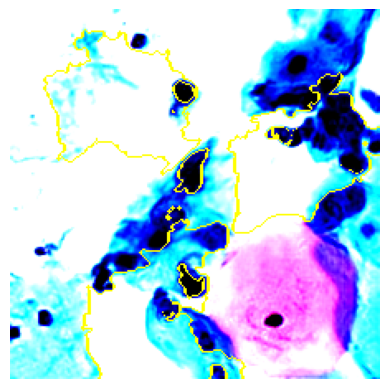

LIME explanation saved at: /content/drive/MyDrive/CellGAN-main/gradcam//lime_explanation_0.png


In [ ]:
import lime
import lime.lime_image
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
import os

# Define LIME Explainer
explainer = lime.lime_image.LimeImageExplainer()

# Directory to save images

save_dir = "/content/drive/MyDrive/CellGAN-main/gradcam/"
os.makedirs(save_dir, exist_ok=True)

# Choose an image from the test set for explanation
image_idx = 0  # Select an image index to explain
test_image = test_images[image_idx].unsqueeze(0).to(device)  # Add batch dimension
test_label = test_labels[image_idx].item()

# Convert image tensor to numpy (LIME requires numpy input)
image_np = test_image.cpu().squeeze(0).permute(1, 2, 0).numpy()

# Define a function that LIME uses to get predictions
def batch_predict(images):
    model.eval()
    batch = torch.tensor(images).permute(0, 3, 1, 2).float().to(device)  # Convert to PyTorch format
    outputs = model(batch)
    return torch.nn.functional.softmax(outputs, dim=1).cpu().detach().numpy()

# Generate explanation
explanation = explainer.explain_instance(
    image_np,
    batch_predict,
    top_labels=5,
    hide_color=0,
    num_samples=1000  # Number of perturbations
)

# Get the most relevant region
temp, mask = explanation.get_image_and_mask(
    test_label,
    positive_only=True,
    num_features=5,
    hide_rest=False
)

# Save and show image
highlighted_image = mark_boundaries(temp, mask)
plt.imshow(highlighted_image)
plt.axis('off')
plt.savefig(f"{save_dir}/lime_explanation_{image_idx}.png", bbox_inches='tight', pad_inches=0)
plt.show()

print(f"LIME explanation saved at: {save_dir}/lime_explanation_{image_idx}.png")


  0%|          | 0/1000 [00:00<?, ?it/s]

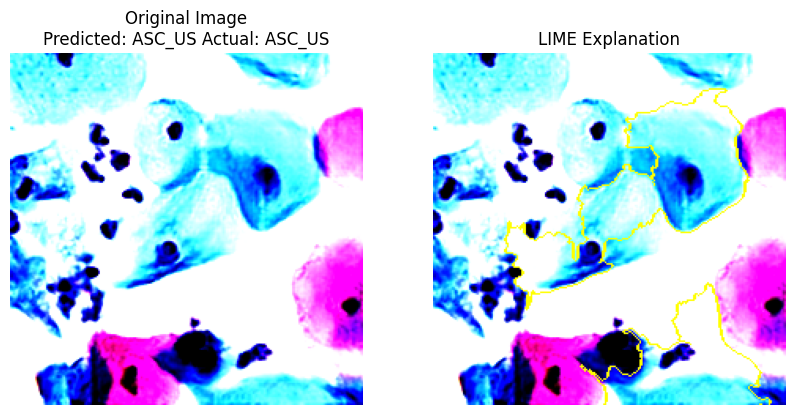

LIME explanation saved at: /content/drive/MyDrive/CellGAN-main/gradcam//lime_explanation_190.png


In [ ]:
import lime
import lime.lime_image
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
import os
import torch

# Define label mapping
label_mapping = {0: 'ASC_H', 1: 'ASC_US', 2: 'HSIL', 3: 'LSIL', 4: 'NILM'}

# Define LIME Explainer
explainer = lime.lime_image.LimeImageExplainer()

# Directory to save images
save_dir = "/content/drive/MyDrive/CellGAN-main/gradcam/"
os.makedirs(save_dir, exist_ok=True)

# Choose an image from the test set for explanation
image_idx = 190  # Select an image index to explain
test_image = test_images[image_idx].unsqueeze(0).to(device)  # Add batch dimension
test_label = test_labels[image_idx].item()

# Convert image tensor to numpy (LIME requires numpy input)
image_np = test_image.cpu().squeeze(0).permute(1, 2, 0).numpy()

# Define a function that LIME uses to get predictions
def batch_predict(images):
    model.eval()
    batch = torch.tensor(images).permute(0, 3, 1, 2).float().to(device)  # Convert to PyTorch format
    outputs = model(batch)
    return torch.nn.functional.softmax(outputs, dim=1).cpu().detach().numpy()

# Get model prediction for the selected image
model.eval()
output = model(test_image)
predicted_label_idx = torch.argmax(output, dim=1).item()
predicted_label = label_mapping[predicted_label_idx]  # Convert numeric label to class name

# Generate explanation using LIME
explanation = explainer.explain_instance(
    image_np,
    batch_predict,
    top_labels=5,
    hide_color=0,
    num_samples=1000  # Number of perturbations
)

# Get the most relevant region from LIME explanation
temp, mask = explanation.get_image_and_mask(
    test_label,
    positive_only=True,
    num_features=5,
    hide_rest=False
)

# LIME Explanation Image
highlighted_image = mark_boundaries(temp, mask)

# Plot original and LIME images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
axes[0].imshow(image_np)
axes[0].axis('off')
axes[0].set_title(f'Original Image\nPredicted: {predicted_label} Actual: {label_mapping[test_label]}')

#axes[0].set_title(f'Original Image\nActual: {test_label}')

# LIME Explained Image
axes[1].imshow(highlighted_image)
axes[1].axis('off')
axes[1].set_title("LIME Explanation")

# Save combined figure
plt.savefig(f"{save_dir}/lime_explanation_{image_idx}.png", bbox_inches='tight', pad_inches=0)
plt.show()

print(f"LIME explanation saved at: {save_dir}/lime_explanation_{image_idx}.png")


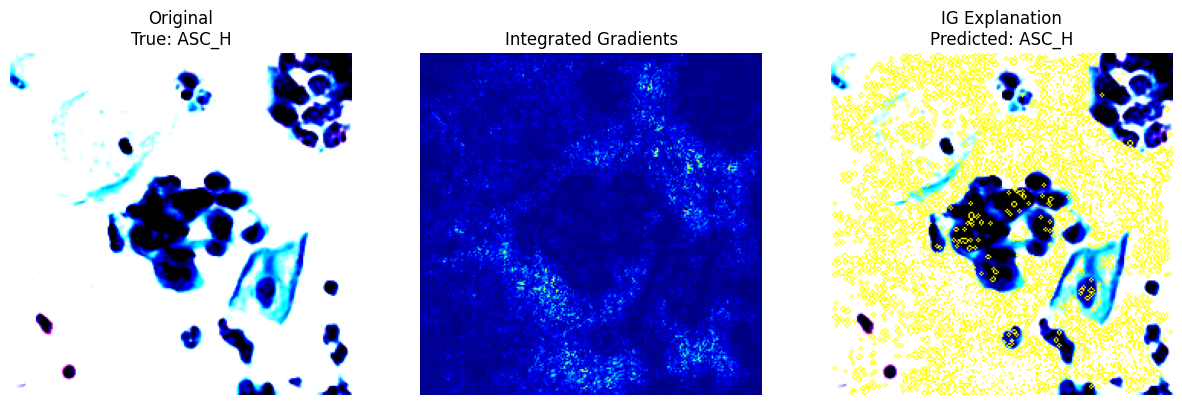

Integrated Gradients explanation saved at: /content/drive/MyDrive/CellGAN-main/integrated_gradients//ig_explanation_3.png


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.segmentation import mark_boundaries

# Define label mapping
label_mapping = {0: 'ASC_H', 1: 'ASC_US', 2: 'HSIL', 3: 'LSIL', 4: 'NILM'}

# Directory to save images
save_dir = "/content/drive/MyDrive/CellGAN-main/integrated_gradients/"
os.makedirs(save_dir, exist_ok=True)

# Choose an image from the test set for explanation
image_idx = 3
test_image = test_images[image_idx].unsqueeze(0).to(device)
test_label = test_labels[image_idx].item()

# Convert image tensor to numpy for visualization
image_np = test_image.cpu().squeeze(0).permute(1, 2, 0).numpy()

# Get model prediction
model.eval()
output = model(test_image)
predicted_label_idx = torch.argmax(output, dim=1).item()
predicted_label = label_mapping[predicted_label_idx]

class IntegratedGradients:
    def __init__(self, model):
        self.model = model

    def generate(self, input_image, target_class=None, baseline=None, steps=50):
        self.model.eval()

        # If no target class is provided, use the predicted class
        if target_class is None:
            with torch.no_grad():
                output = self.model(input_image)
                target_class = torch.argmax(output, dim=1).item()

        # Use a black image as baseline if none provided
        if baseline is None:
            baseline = torch.zeros_like(input_image).to(device)

        # Ensure input requires gradients
        input_image = input_image.clone().detach().requires_grad_(True)

        # Generate scaled inputs between baseline and input
        scaled_inputs = [baseline + (float(i) / steps) * (input_image - baseline)
                        for i in range(steps + 1)]

        # Forward pass for all scaled inputs and compute gradients
        grads = []
        for scaled_input in scaled_inputs:
            # Clone and ensure requires_grad
            scaled_input = scaled_input.clone().detach().requires_grad_(True)
            output = self.model(scaled_input)
            score = output[0, target_class]

            # Clear previous gradients
            self.model.zero_grad()

            # Compute gradients
            score.backward()

            # Append the gradient
            if scaled_input.grad is not None:
                grads.append(scaled_input.grad.clone())
            else:
                raise ValueError("Gradient computation failed for scaled input.")

        # Average the gradients
        grads = torch.stack(grads)
        avg_grads = torch.mean(grads, dim=0)

        # Compute Integrated Gradients: (input - baseline) * avg_grads
        integrated_grads = (input_image - baseline) * avg_grads

        # Sum across channels and take absolute value
        ig_map = torch.sum(torch.abs(integrated_grads), dim=1).squeeze(0)

        # Normalize for visualization
        ig_map = ig_map - ig_map.min()
        ig_map = ig_map / (ig_map.max() + 1e-8)

        return ig_map.detach().cpu()

# Initialize Integrated Gradients
ig = IntegratedGradients(model)

# Generate Integrated Gradients map
try:
    ig_map = ig.generate(test_image)
except Exception as e:
    print(f"Error generating Integrated Gradients: {e}")
    raise

# Convert to numpy for visualization
ig_map_np = ig_map.numpy()

# Create a binary mask for important regions (similar to LIME)
threshold = np.percentile(ig_map_np, 75)  # Top 25% of values
mask = (ig_map_np > threshold).astype(np.uint8)

# Apply boundaries to highlight important regions
highlighted_image = mark_boundaries(image_np, mask)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
axes[0].imshow(image_np)
axes[0].axis('off')
axes[0].set_title(f'Original\nTrue: {label_mapping[test_label]}')

# Integrated Gradients Heatmap
axes[1].imshow(ig_map_np, cmap='jet')
axes[1].axis('off')
axes[1].set_title('Integrated Gradients')

# Highlighted Image
axes[2].imshow(highlighted_image)
axes[2].axis('off')
axes[2].set_title(f'IG Explanation\nPredicted: {predicted_label}')

# Save figure
plt.savefig(f"{save_dir}/ig_explanation_{image_idx}.png", bbox_inches='tight', pad_inches=0)
plt.show()

print(f"Integrated Gradients explanation saved at: {save_dir}/ig_explanation_{image_idx}.png")